🔠 Column Name Mapping (Original → Short):

Sl. NO → SlNO
Name an Address of the Unit → NameanAddres
Type of Incentives  → TypeofIncent
 Released Amount 
(In Rs.)  → ReleasAmount

📄 Dataset Shape: (23, 4)

📋 Columns: ['SlNO', 'NameanAddres', 'TypeofIncent', 'ReleasAmount']

🧱 Data Types:
 SlNO            float64
NameanAddres     object
TypeofIncent     object
ReleasAmount     object
dtype: object

🔢 Missing Values:
 SlNO            1
NameanAddres    0
TypeofIncent    1
ReleasAmount    0
dtype: int64

🔎 Sample Data:



,SlNO,NameanAddres,TypeofIncent,ReleasAmount
0,1.0,"M/s Mylar Sugars Limited, Birabbi village, Huv...",Anchor Unit Subsidy,"3,60,31,229"
1,2.0,"M/s A.O Smith India Product Private Limited, A...",ETP Subsidy,"3,00,000"
2,3.0,"M/s Mysore Markantail Company Limited, Gojanur...",Renewable Energy Projects 50% VAT reimbursemen...,"16,13,793"
3,4.0,"M/s Gluco Biotech Pvt., Ltd., Gejjaganahalli ...",Land Conversion Fee Reimbursement,"5,23,958"
4,5.0,"M/s Magnam tuff India Private Limited, Chikkod...",Land Conversion Fee Reimbursement,"1,47,150"



📊 Numerical Summary:



,SlNO
count,22.000000
mean,11.500000
std,6.493587
min,1.000000
25%,6.250000
50%,11.500000
75%,16.750000
max,22.000000



🔤 Categorical Summary:



,NameanAddres,TypeofIncent,ReleasAmount
count,23,22,23
unique,22,7,19
top,"M/s Harsha Sugars Limited, Savadatti village a...",ETP Subsidy,"1,00,00,000"
freq,2,9,3


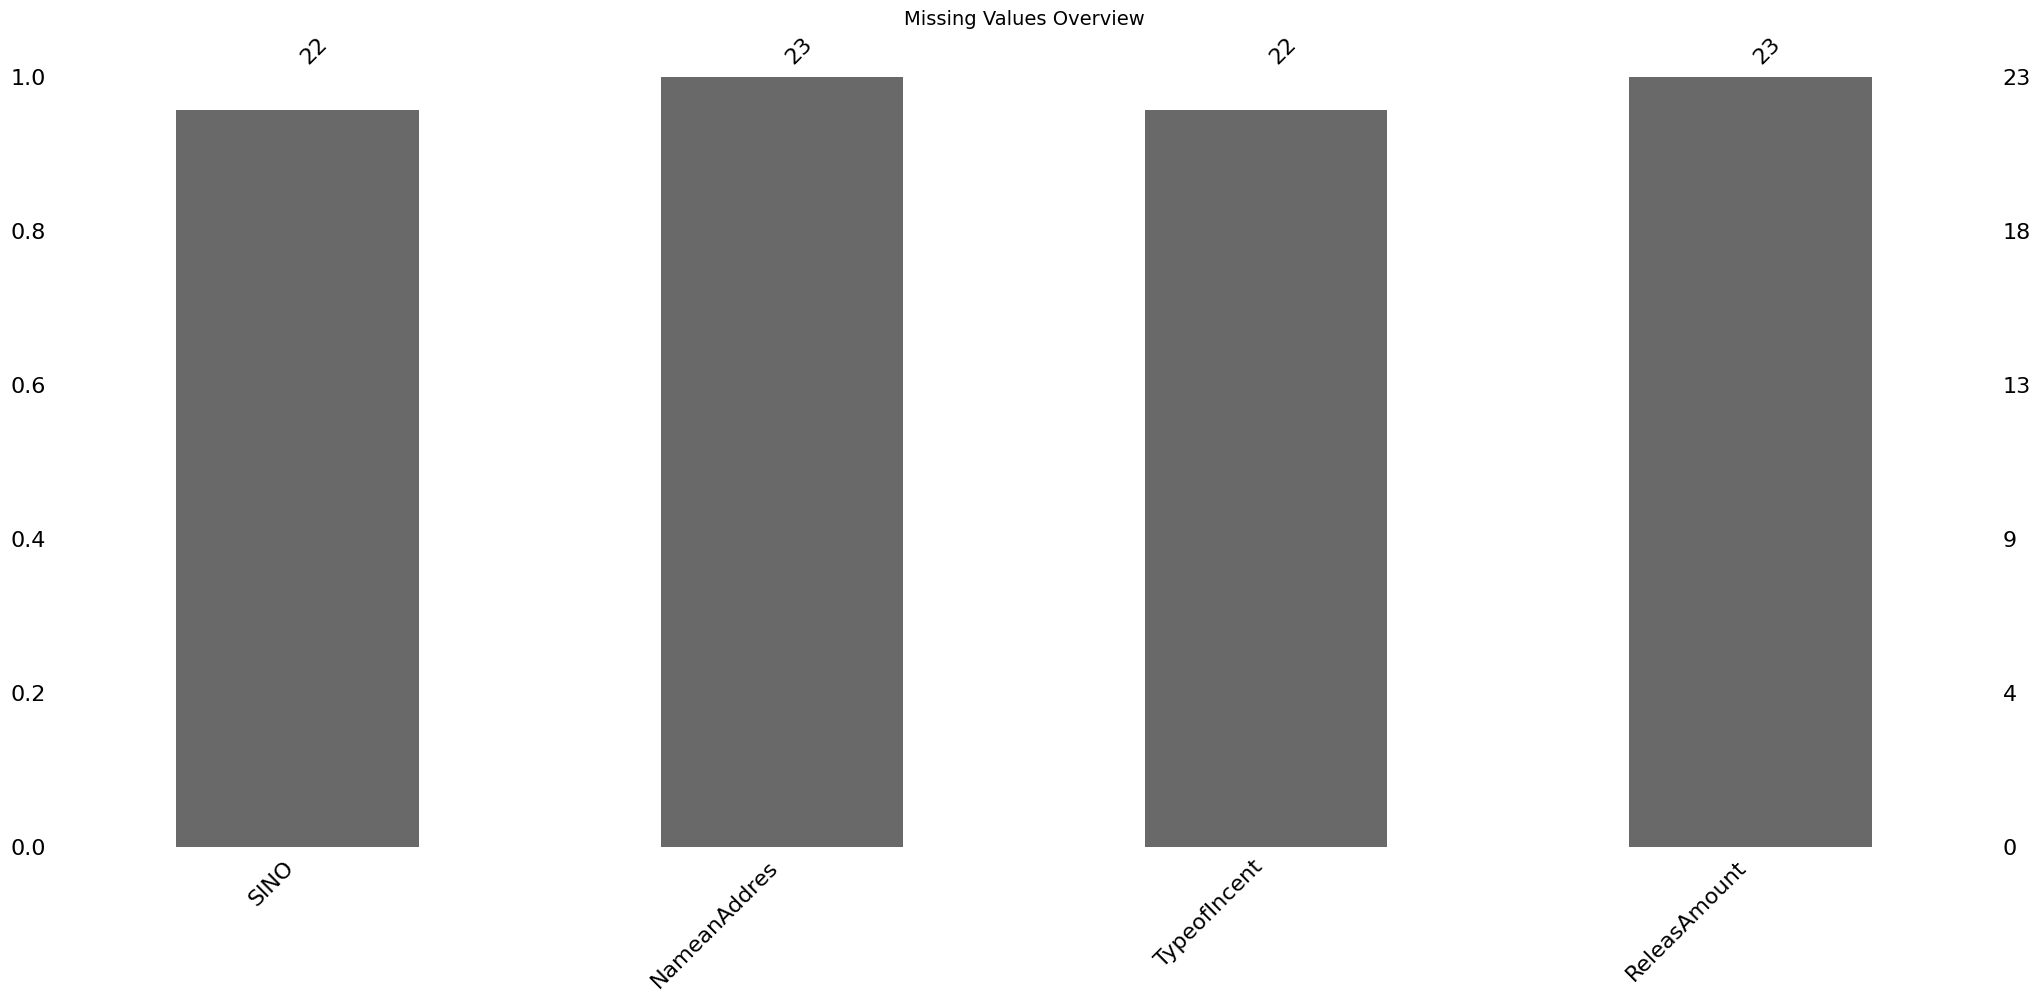

<Figure size 1000x600 with 0 Axes>

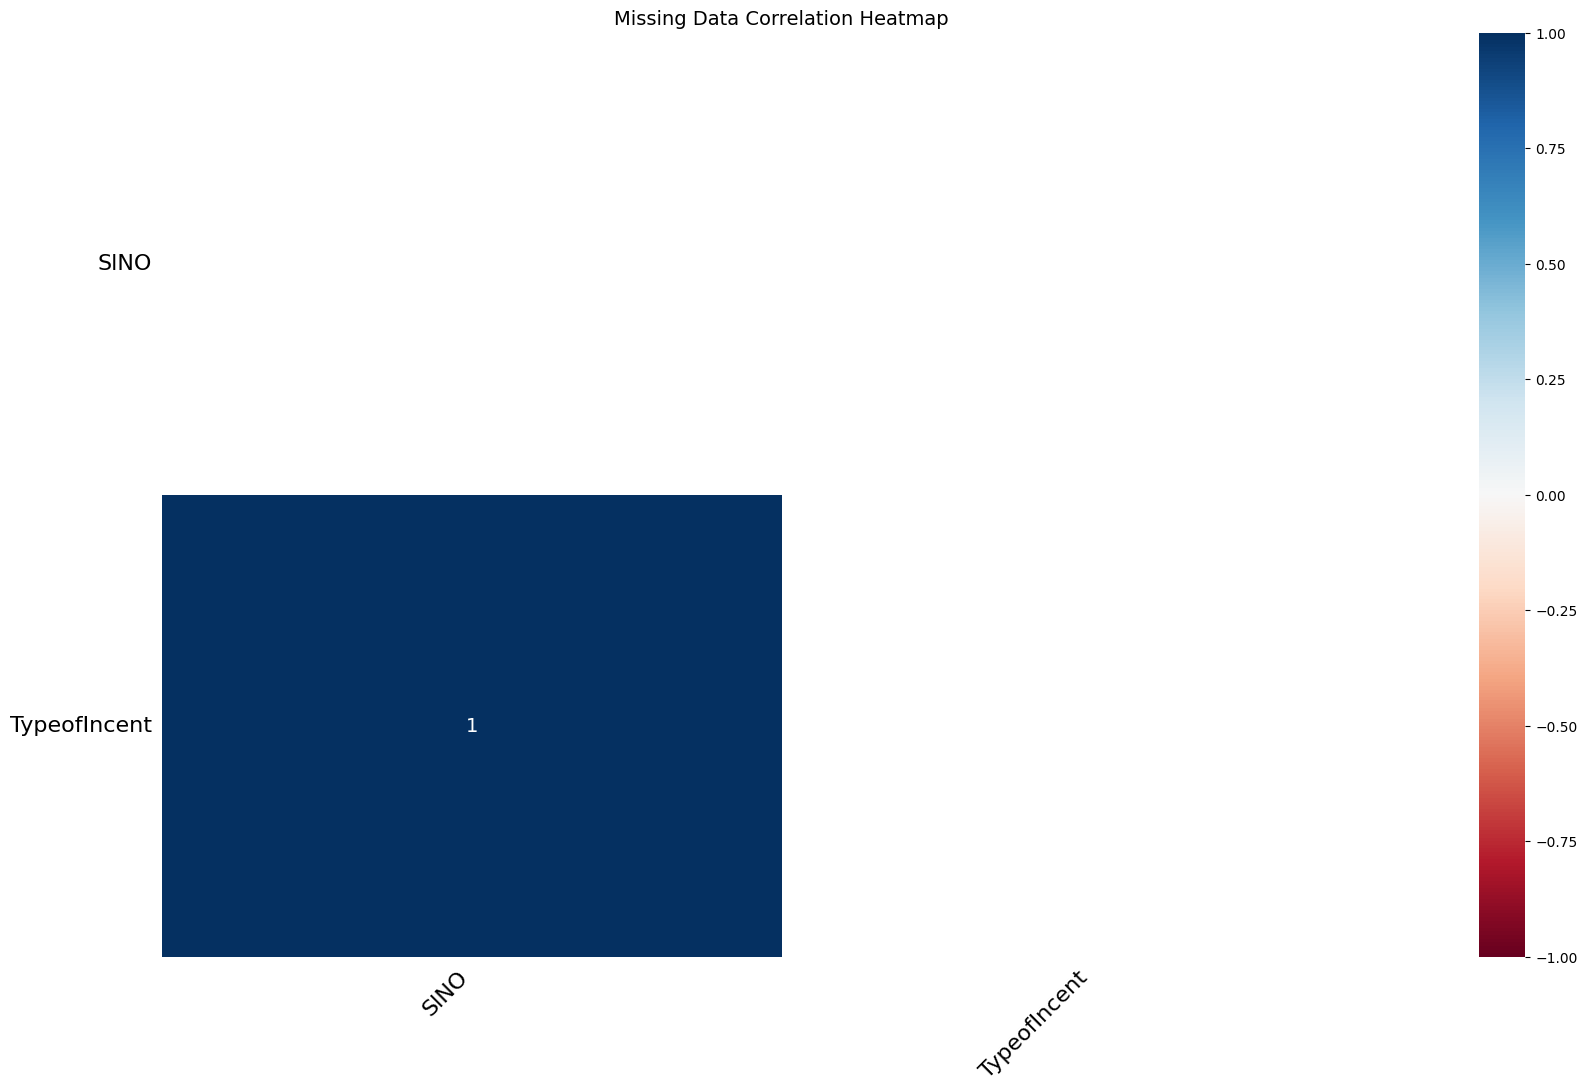

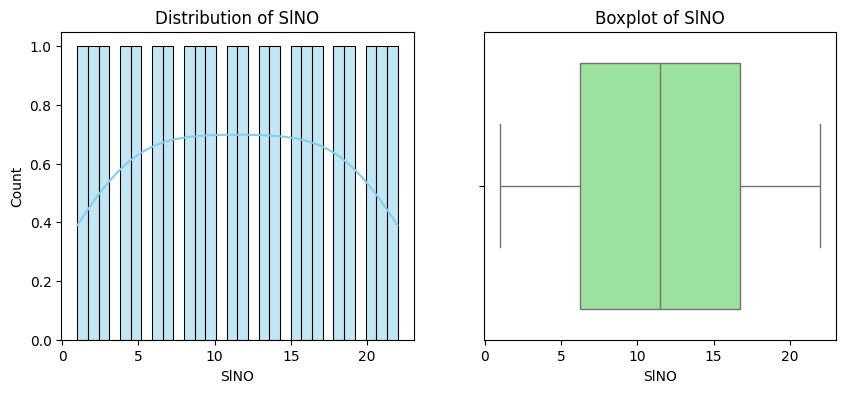

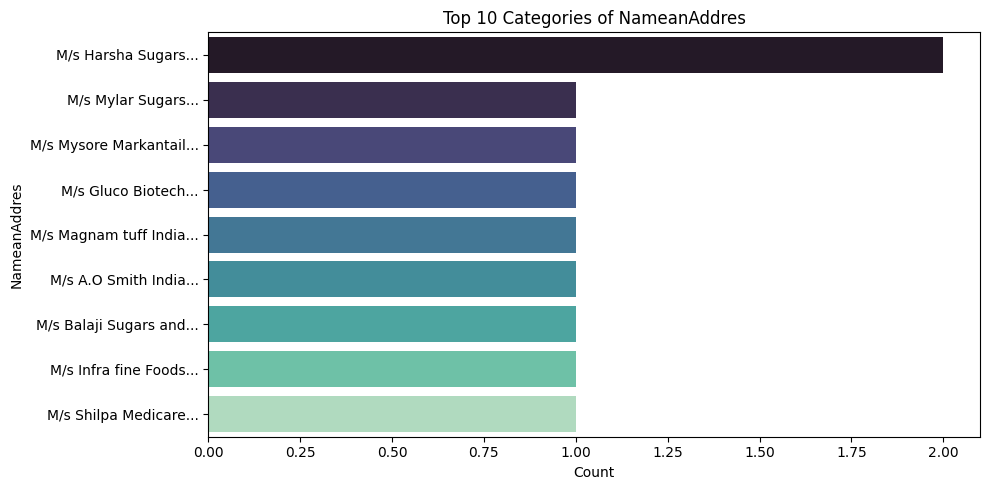

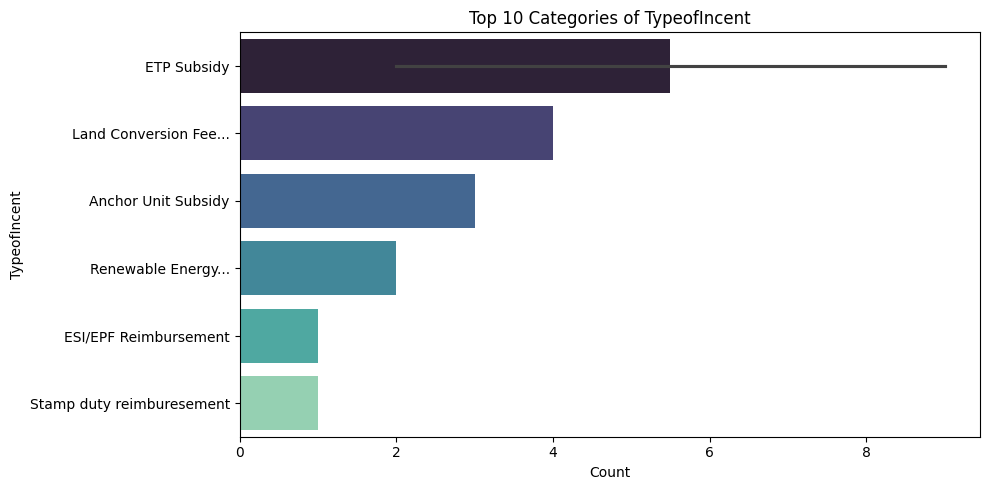

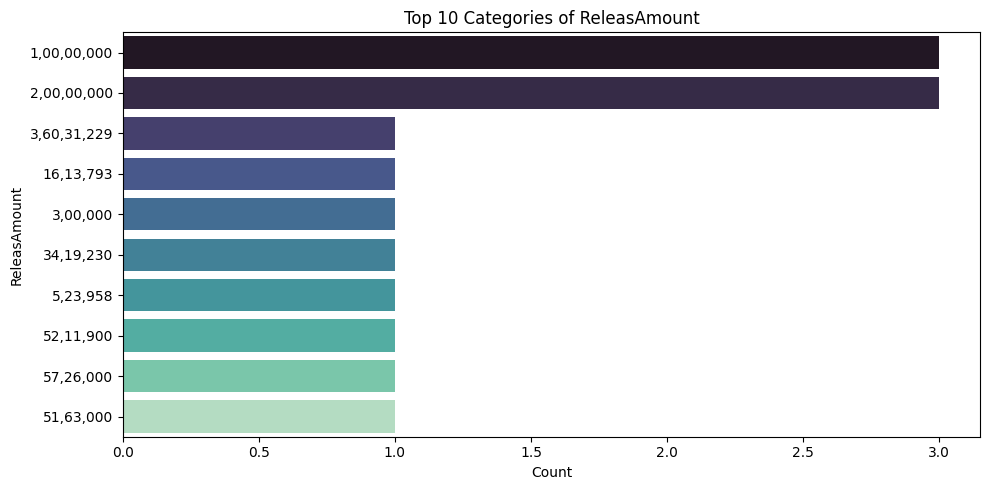

SlNO: 0 outliers detected


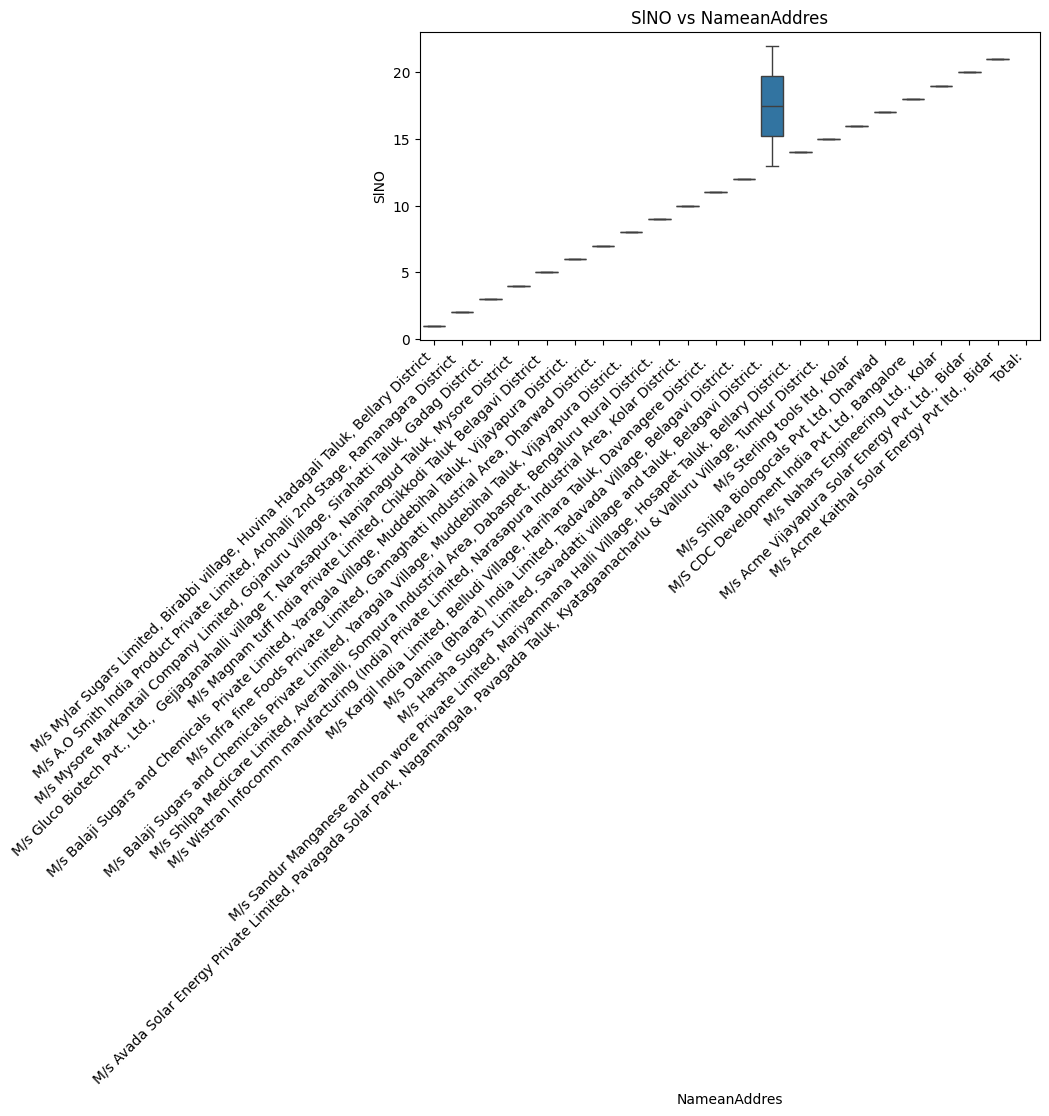

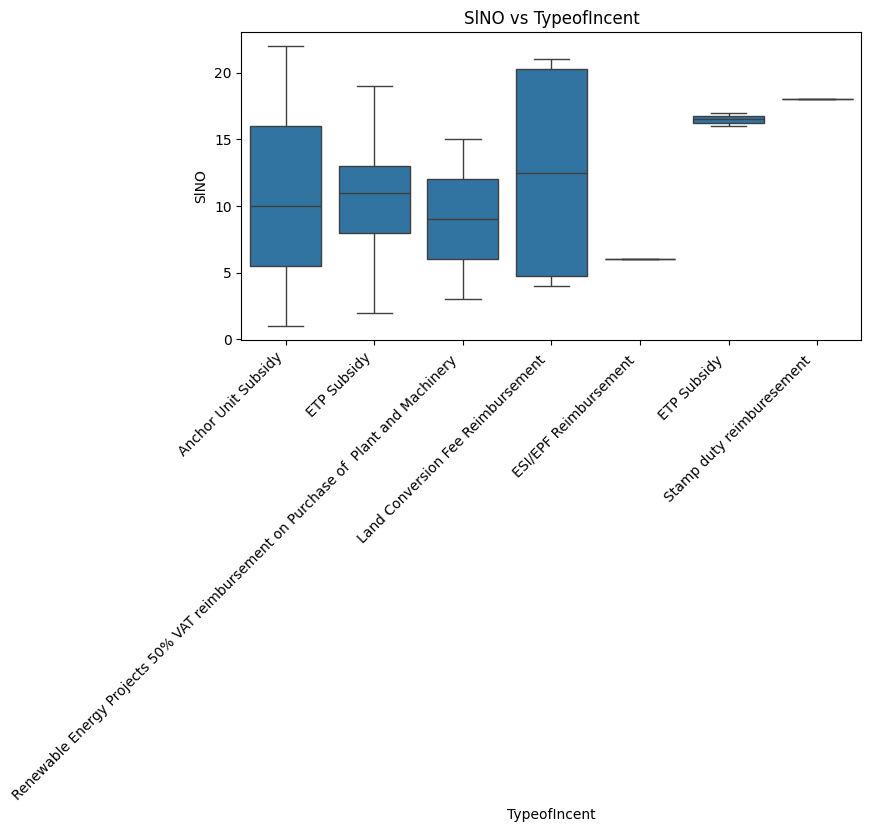

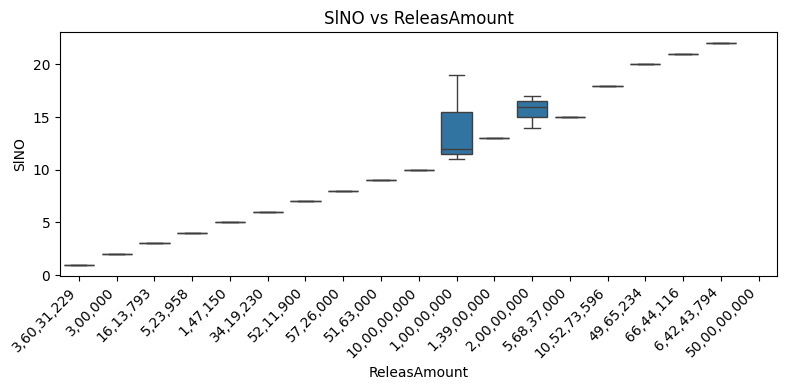


✅ EDA Completed Successfully!
Total Columns: 4
Numeric Columns: 1
Categorical Columns: 3
Missing Value Columns: 2


In [3]:
#this is manual code approach for EDA


# ============================
# 📊 Step 1: Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.api.types import is_numeric_dtype, is_categorical_dtype
import textwrap
import warnings
warnings.filterwarnings("ignore")

# ============================
# 📂 Step 2: Load Dataset
# ============================
file_path = "/content/subsidy_releases_2021-22_1.csv"  # upload file first
df = pd.read_csv(file_path)

# ============================
# ✂️ Step 3: Short Column Names
# ============================
original_cols = df.columns.tolist()
short_cols = {}

for col in original_cols:
    short_name = (
        col.replace(" ", "_")
           .replace("-", "_")
           .replace("/", "_")
           .replace("(", "")
           .replace(")", "")
           .replace(".", "")
    )
    short_name = "".join(word[:6] for word in short_name.split("_"))[:12]
    short_cols[col] = short_name

df.rename(columns=short_cols, inplace=True)

print("🔠 Column Name Mapping (Original → Short):\n")
for k, v in short_cols.items():
    print(f"{k} → {v}")

# ============================
# 🔍 Step 4: Basic Info
# ============================
print("\n📄 Dataset Shape:", df.shape)
print("\n📋 Columns:", df.columns.tolist())
print("\n🧱 Data Types:\n", df.dtypes)
print("\n🔢 Missing Values:\n", df.isnull().sum())
print("\n🔎 Sample Data:\n")
display(df.head())

# ============================
# 📈 Step 5: Summary Statistics
# ============================
print("\n📊 Numerical Summary:\n")
display(df.describe())
print("\n🔤 Categorical Summary:\n")
display(df.describe(include='object'))

# ============================
# 📉 Step 6: Missing Value Analysis
# ============================
plt.figure(figsize=(10, 5))
msno.bar(df)
plt.title("Missing Values Overview", fontsize=14)
plt.show()

plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title("Missing Data Correlation Heatmap", fontsize=14)
plt.show()

# ============================
# 🧮 Step 7: Univariate Analysis
# ============================
numeric_cols = [col for col in df.columns if is_numeric_dtype(df[col])]
categorical_cols = [col for col in df.columns if is_categorical_dtype(df[col]) or df[col].dtype == 'object']

# --- Numeric Features ---
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

# --- Categorical Features ---
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    top_values = df[col].value_counts().head(10)
    # Shorten long labels
    top_values.index = [textwrap.shorten(str(x), width=25, placeholder="...") for x in top_values.index]
    sns.barplot(x=top_values.values, y=top_values.index, palette="mako")
    plt.title(f"Top 10 Categories of {col}", fontsize=12)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ============================
# 🔁 Step 8: Bivariate Analysis
# ============================
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# Pairplot (only if dataset small)
if df.shape[0] < 2000 and len(numeric_cols) > 1:
    sns.pairplot(df[numeric_cols])
    plt.show()

# ============================
# 🎯 Step 9: Outlier Detection (IQR)
# ============================
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col}: {len(outliers)} outliers detected")

# ============================
# 🔍 Step 10: Categorical vs Numeric
# ============================
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    for cat in categorical_cols[:3]:
        for num in numeric_cols[:3]:
            plt.figure(figsize=(8,4))
            sns.boxplot(x=cat, y=num, data=df)
            plt.title(f"{num} vs {cat}")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

# ============================
# 🧾 Step 11: Summary
# ============================
print("\n✅ EDA Completed Successfully!")
print(f"Total Columns: {len(df.columns)}")
print(f"Numeric Columns: {len(numeric_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")
print(f"Missing Value Columns: {df.isnull().sum().astype(bool).sum()}")


In [1]:
#This is 2nd approach
#this approach will take eda report in just 1 line code

import pandas as pd
!pip install ydata-profiling
from ydata_profiling import ProfileReport
df=pd.read_csv('/content/subsidy_releases_2021-22_1.csv')
profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 24.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]